In [3]:
from sympy import symbols, init_printing, Matrix, simplify, factor, Eq, solve, Symbol
from sympy.physics.quantum import Dagger
init_printing()

In [4]:
s11, s12, s13 = symbols(r'\sigma_{11}, \sigma_{12}, \sigma_{13}', real=True)
s21, s22, s23 = symbols(r'\sigma_{21}, \sigma_{22}, \sigma_{23}', real=True)
s31, s32, s33 = symbols(r'\sigma_{31}, \sigma_{32}, \sigma_{33}', real=True)

In [5]:
mhat11, mhat12, mhat13 = symbols(r'\hat{m}_{11}, \hat{m}_{12}, \hat{m}_{13}', real=True)
mhat21, mhat22, mhat23 = symbols(r'\hat{m}_{21}, \hat{m}_{22}, \hat{m}_{23}', real=True)
mhat31, mhat32, mhat33 = symbols(r'\hat{m}_{31}, \hat{m}_{32}, \hat{m}_{33}', real=True)

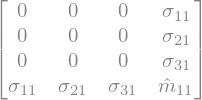

In [6]:
etap = Matrix(
    [
        [0, 0, 0, s11],
        [0, 0, 0, s21],
        [0, 0, 0, s31],
        [s11, s21, s31, mhat11]
    ]
)
etap

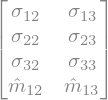

In [7]:
chip = Matrix(
    [
        [s12, s13],
        [s22, s23],
        [s32, s33],
        [mhat12, mhat13]
    ]
)
chip

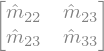

In [8]:
mhatp = Matrix(
    [
        [mhat22, mhat23],
        [mhat23, mhat33]
    ]
)
mhatp

In [9]:
SS = chip*mhatp*chip.T

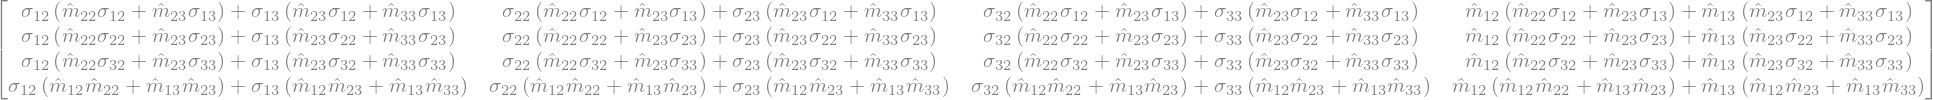

In [10]:
SS

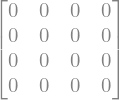

In [91]:
simplify(SS.T - SS)

In [11]:
Mlight = etap - SS

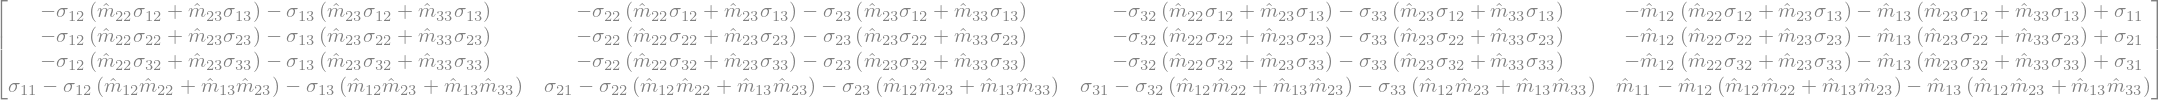

In [12]:
Mlight

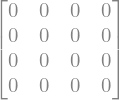

In [92]:
simplify(Mlight.T - Mlight)

In [13]:
for i in range(4):
    display(Mlight[3,i].simplify())

In [14]:
mhatp_diag_case = {
    mhat12:0, mhat13:0, mhat23:0
}

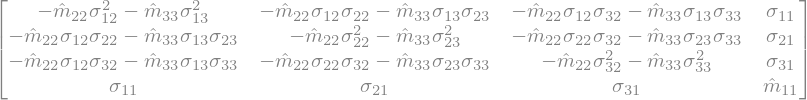

In [15]:
Mlight1 = Mlight.subs(mhatp_diag_case)
Mlight1

In [87]:
Mlight1.T == Mlight1

True

## Mixing matrix

In [17]:
u11, u12, u13, u14 = symbols(r'u_{11}, u_{12}, u_{13}, u_{14}', real=True)
u21, u22, u23, u24 = symbols(r'u_{21}, u_{22}, u_{23}, u_{24}', real=True)
u31, u32, u33, u34 = symbols(r'u_{31}, u_{32}, u_{33}, u_{34}', real=True)
u41, u42, u43, u44 = symbols(r'u_{41}, u_{42}, u_{43}, u_{44}', real=True)

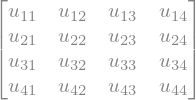

In [18]:
U = Matrix(
    [
        [u11, u12, u13, u14],
        [u21, u22, u23, u24],
        [u31, u32, u33, u34],
        [u41, u42, u43, u44]
    ]
)
U

In [19]:
Udagger = Dagger(U)

## Diagonalization

In [20]:
mlight1 = Udagger*Mlight1*U

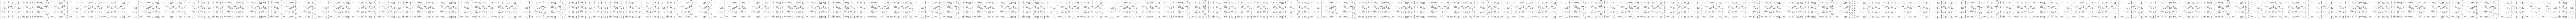

In [21]:
mlight1

In [22]:
from neutrinos import UpmnsStandardParametrization, NuOscObservables
th12, th13, th23 = symbols(r'\theta_{12},\theta_{13},\theta_{23}', real=True)
Upmns = UpmnsStandardParametrization(th12, th13, th23)

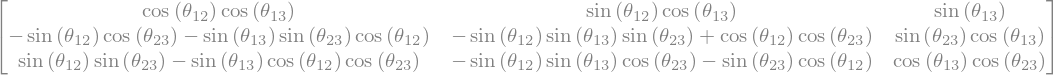

In [23]:
Upmns

In [24]:
Upmns_changes = {U[i,j]:Upmns[i,j] for i in range(3) for j in range(3)}

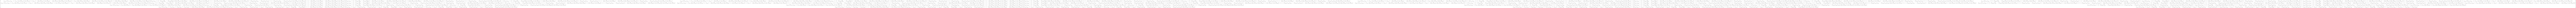

In [25]:
mlight2 = mlight1.subs(Upmns_changes)
mlight2

In [26]:
m4 = symbols('m_4', positive=True)

In [27]:
(mlight1[3, 0] - mlight1[0, 3]).simplify()

### solving for $U_{4i}$

In [28]:
eq41 = Eq(mlight2[3, 0], 0)
eq42 = Eq(mlight2[3, 1], 0)
eq43 = Eq(mlight2[3, 2], 0)
eq44 = Eq(mlight2[3, 3], mhat11)
eq14 = Eq(mlight2[0, 3], 0)
eq24 = Eq(mlight2[1, 3], 0)
eq34 = Eq(mlight2[2, 3], 0)

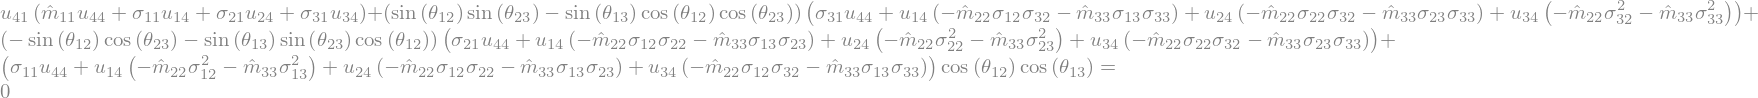

In [29]:
eq41

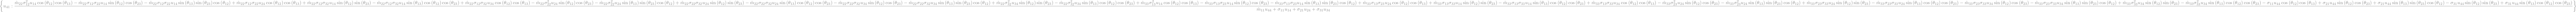

In [30]:
u41_sol = solve(eq41, u41, dict=True)[0]
u41_sol

In [31]:
eq14.subs(u41_sol).simplify()

In [32]:
eq42 = eq42.subs(u41_sol).simplify()

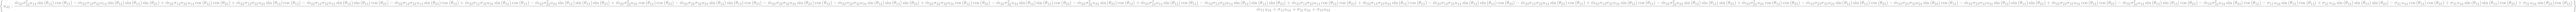

In [33]:
u42_sol = solve(eq42, u42, dict=True)[0]
u42_sol

In [34]:
eq24.subs(u42_sol).simplify()

In [35]:
eq43 = eq43.subs(u42_sol).simplify()

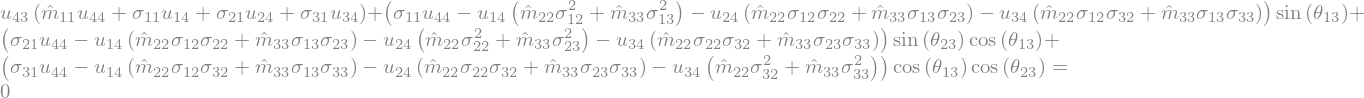

In [36]:
eq43

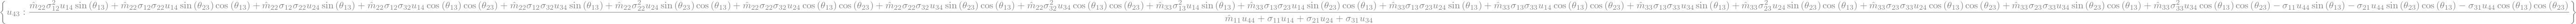

In [37]:
u43_sol = solve(eq43, u43, dict=True)[0]
u43_sol

In [38]:
eq34.subs(u43_sol).simplify()

In [39]:
eq44 = eq44.subs(u43_sol).simplify()

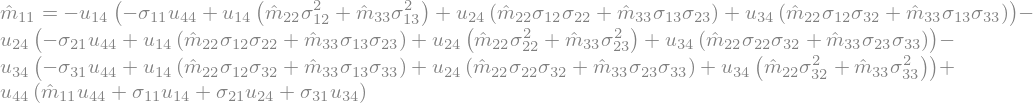

In [40]:
eq44

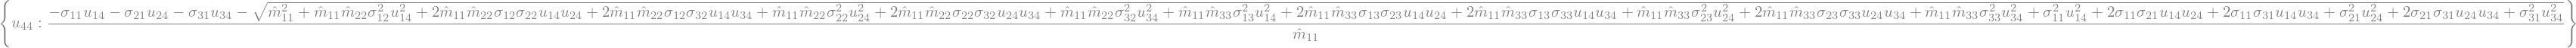

In [41]:
u44_sol = solve(eq44, u44, dict=True)[0]
u44_sol

In [42]:
u41_sol[u41].atoms(Symbol)


In [43]:
u41_sol[u41] = u41_sol[u41].subs(u44_sol).simplify()

In [44]:
u41_sol[u41].atoms(Symbol)

In [45]:
u42_sol[u42].atoms(Symbol)

In [46]:
u42_sol[u42] = u42_sol[u42].subs(u44_sol).simplify()

In [47]:
u42_sol[u42].atoms(Symbol)

In [48]:
u43_sol[u43].atoms(Symbol)

In [49]:
u43_sol[u43] = u43_sol[u43].subs(u44_sol).simplify()

In [50]:
u43_sol[u43].atoms(Symbol)

In [51]:
u44_sol[u44].atoms(Symbol)

### solving for $U_{3i}$

In [52]:
m1, m2, m3 = symbols('m_1, m_2, m_3', positive=True)

In [76]:
eq11 = Eq(mlight2[0, 0], m1)
eq21 = Eq(mlight2[1, 0], 0)
eq12 = Eq(mlight2[0, 1], 0)
eq22 = Eq(mlight2[1, 1], m2)
eq31 = Eq(mlight2[2, 0], 0)
eq13 = Eq(mlight2[0, 2], 0)
eq32 = Eq(mlight2[2, 1], 0)
eq23 = Eq(mlight2[1, 2], 0)
eq33 = Eq(mlight2[2, 2], m3)

In [78]:
s21_sol = solve(eq21, s21, dict=True)[0]

In [79]:
s21_sol[s21].atoms(Symbol)

In [80]:
eq12.subs(s21_sol).simplify()

In [81]:
eq31.subs(s21_sol).atoms(Symbol)

In [82]:
s31_sol = solve(eq31.subs(s21_sol), s31, dict=True)[0]

In [83]:
s31_sol[s31].atoms(Symbol)

In [85]:
eq13.subs(s31_sol).atoms(Symbol)

## Sustitutions

In [ ]:
U

In [93]:
U1 = U.subs(Upmns_changes).subs(u41_sol).subs(u42_sol).subs(u43_sol).subs(u44_sol)

In [94]:
U1.atoms(Symbol)

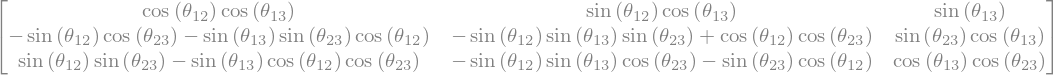

In [97]:
upmns_f = Matrix([[U1[i,j] for j in range(3)] for i in range(3)])
upmns_f

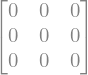

In [98]:
upmns_f - Upmns

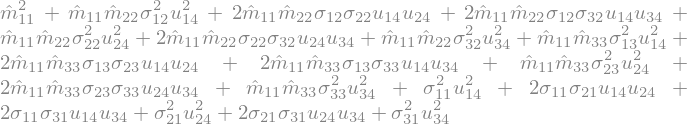

In [105]:
U1[3, 0].args[1].args[0].factor()

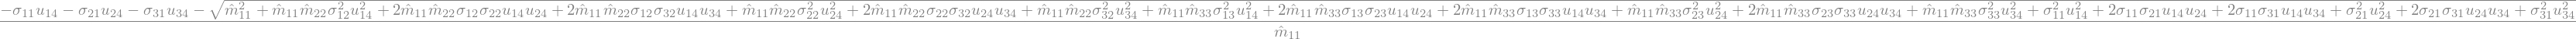

In [106]:
U1[3, 3]

In [107]:
masses_light = Dagger(U1)*Mlight1*U1

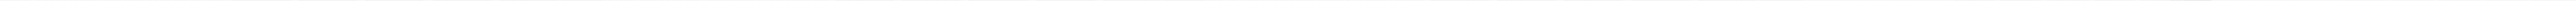

In [110]:
masses_light[0,0]